# Data Quality Control + Clustering + Pseudotime Analysis

In [1]:
# import packages 
import pandas as pd 
import numpy as np
import randomly
import anndata2ri
import scanpy as sc 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# read the preprocess data: 
adata = sc.read_h5ad('./EpCAM_adata.gz')

In [3]:
adata

AnnData object with n_obs × n_vars = 8277 × 32285
    obs: 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'ident'
    layers: 'logcounts'

In [77]:
# filter condition: 
filter_condition = adata.obs.loc[(adata.obs.nUMI >= 1) & (adata.obs.nUMI <=100000) & \
                                 (adata.obs.nGene >= 100) & (adata.obs.log10GenesPerUMI > 0.8) & \
                                 (adata.obs.mitoRatio<0.2)]

In [78]:
filter_condition

,seq_folder,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,sample,ident
AAACCCAAGAAACACT-1,mSG_EpCAM,30236.0,5516.0,0.835086,0.090521,AAACCCAAGAAACACT-1,mSG,mSG_EpCAM
AAACCCATCTTTCAGT-1,mSG_EpCAM,1967.0,962.0,0.905693,0.156584,AAACCCATCTTTCAGT-1,mSG,mSG_EpCAM
AAACGAACACAAGCCC-1,mSG_EpCAM,13959.0,3305.0,0.849046,0.115768,AAACGAACACAAGCCC-1,mSG,mSG_EpCAM
AAACGCTAGAGATCGC-1,mSG_EpCAM,30771.0,4347.0,0.810623,0.089955,AAACGCTAGAGATCGC-1,mSG,mSG_EpCAM
AAACGCTAGCGATTCT-1,mSG_EpCAM,6984.0,2232.0,0.871125,0.048540,AAACGCTAGCGATTCT-1,mSG,mSG_EpCAM
...,...,...,...,...,...,...,...,...
TTTGTTGAGCTAGAAT-1,mSG_EpCAM,11702.0,3273.0,0.863992,0.109127,TTTGTTGAGCTAGAAT-1,mSG,mSG_EpCAM
TTTGTTGAGGAAACGA-1,mSG_EpCAM,23955.0,3366.0,0.805388,0.107201,TTTGTTGAGGAAACGA-1,mSG,mSG_EpCAM
TTTGTTGGTGGCTAGA-1,mSG_EpCAM,19948.0,4057.0,0.839137,0.178364,TTTGTTGGTGGCTAGA-1,mSG,mSG_EpCAM
TTTGTTGGTGTGTCCG-1,mSG_EpCAM,28251.0,3838.0,0.805230,0.103430,TTTGTTGGTGTGTCCG-1,mSG,mSG_EpCAM


In [106]:
df_filter = pd.DataFrame(adata[filter_condition.index,:].X.toarray().copy())
df_filter.columns = adata.var_names
df_filter.index = filter_condition.index
df_filter.head()

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Gm16367,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1
AAACCCAAGAAACACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACCCATCTTTCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACGAACACAAGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACGCTAGAGATCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACGCTAGCGATTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [94]:
adata_filter = adata[filter_condition.index,:].copy()
adata_filter

AnnData object with n_obs × n_vars = 3274 × 32285
    obs: 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'ident'
    layers: 'logcounts'

### Using Randomly 

In [107]:
model = randomly.Rm()
model.preprocess(df_filter, min_tp=0, 
                    min_genes_per_cell=0, 
                    min_cells_per_gene=0,
                    refined=True)

Run the refining function


In [108]:
model.refining(min_trans_per_gene=7)

3274  cells and  12742  genes


In [109]:
model.fit()

Preprocessed data is being used for fitting


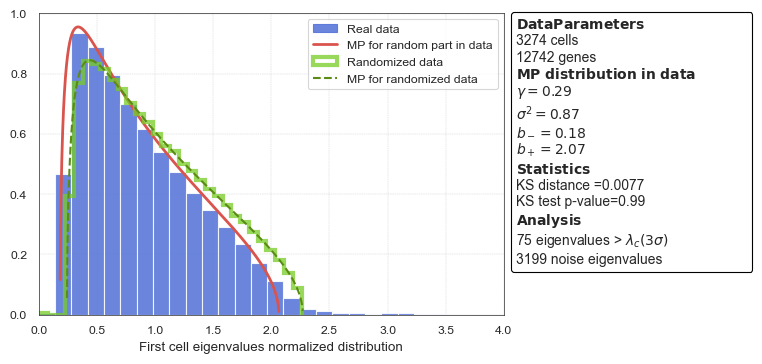

In [110]:
model.plot_mp()

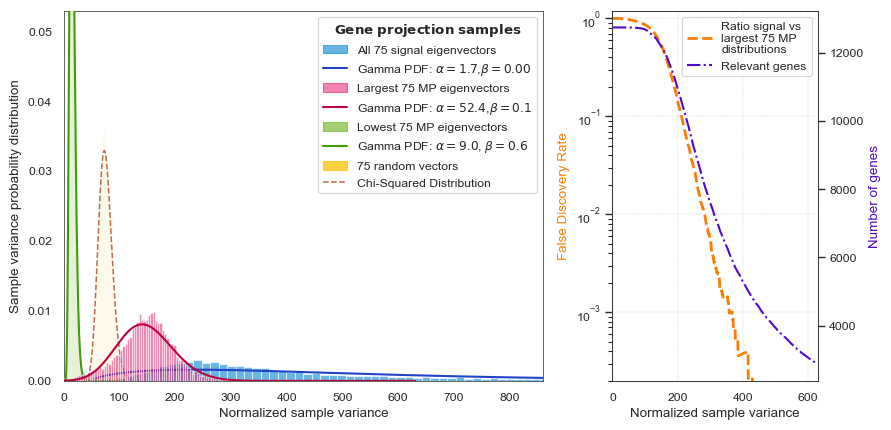

In [111]:
model.plot_statistics()

computing t-SNE, using Multicore t-SNE for 4 jobs
atribute embedding is updated with t-SNE coordinates


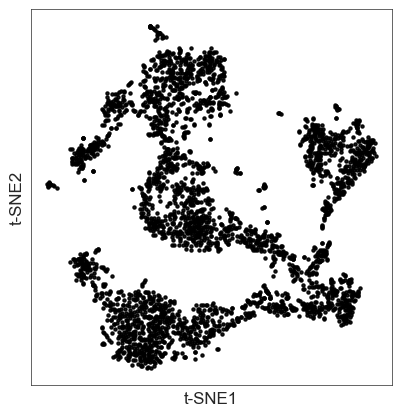

In [187]:
model.fit_tsne(fdr=0.0001)
model.plot()

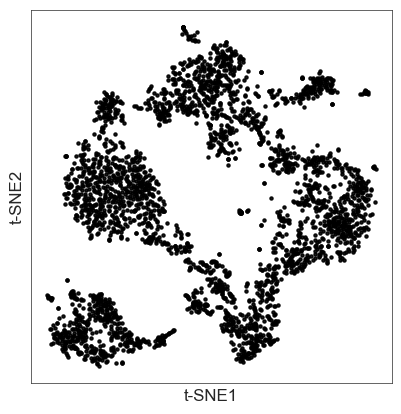

In [167]:
model.plot()

In [112]:
df_clean = model.return_cleaned(fdr=0.0001)

In [114]:
df_clean.head()

,Adam11,Veph1,Fbxo24,Lypd2,Zfp57,Sgcd,Ankrd35,Gng3,Wipf1,Atcayos,...,Klk1b26,Mucl2,mt-Co2,mt-Cytb,mt-Atp6,mt-Co1,mt-Co3,Malat1,Smgc,Klk1
AAACCCAAGAAACACT-1,0.792947,-0.263310,-0.336567,0.762575,0.917334,1.133676,-0.701052,0.948990,0.868001,0.008388,...,-0.113787,-0.741040,-0.469441,-0.675754,-0.448574,-0.584104,-0.463511,0.142729,-0.218572,-0.427248
AAACCCATCTTTCAGT-1,-0.092658,-0.043378,-0.325317,-0.118588,-0.033726,-0.022544,-0.026863,-0.206516,-0.078444,-0.220719,...,0.321457,1.394425,0.082787,0.108290,0.292069,0.112101,0.256328,0.288930,-0.065566,0.458221
AAACGAACACAAGCCC-1,0.116149,0.349744,0.357351,-0.486463,-0.368382,0.889557,-0.083580,-0.184844,-0.052772,-0.350869,...,0.391156,-0.541944,0.481937,0.310580,0.492933,0.480993,0.548342,-0.219817,-0.563866,-0.020338
AAACGCTAGAGATCGC-1,-0.311636,0.510437,0.522276,0.116205,-0.123354,0.136396,-0.048616,-0.131657,-0.601935,-0.207884,...,1.450341,-0.991748,0.351858,0.404764,0.430504,0.373003,0.382011,-0.399112,-0.619866,1.302805
AAACGCTAGCGATTCT-1,-0.218154,-0.066466,-0.182879,-0.070903,-0.031510,-0.094948,0.175431,-0.214273,0.117006,-0.038548,...,-0.756634,0.554406,-0.397570,-0.265777,-0.486885,-0.656837,-0.435669,0.336823,-0.417014,-0.898548


In [115]:
# create a new anndata object: 
adata_filter = sc.AnnData(df_clean, obs = filter_condition)

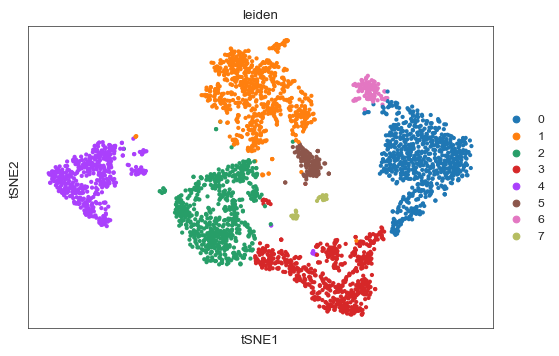

In [181]:
# default setting 
sc.tl.pca(adata_filter, svd_solver = "arpack")
sc.pp.neighbors(adata_filter)
sc.tl.tsne(adata_filter)
sc.tl.leiden(adata_filter, resolution = 0.3)
sc.pl.tsne(adata_filter, color = "leiden")

In [182]:
# evaluate the cluster 
from sklearn.metrics import silhouette_score
X = pd.DataFrame(adata_filter.X)
labels = adata_filter.obs["leiden"]
silhouetee_score_leiden02 = silhouette_score(X, labels)

In [183]:
silhouetee_score_leiden02

0.25962216

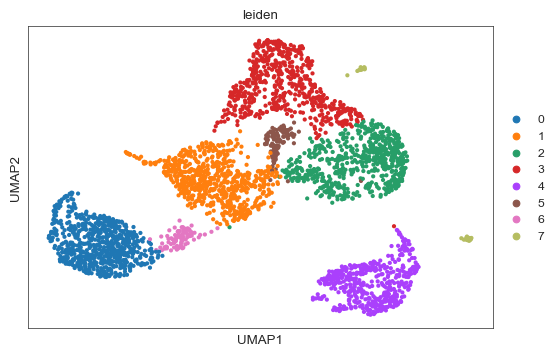

In [185]:
# UMAP 
sc.tl.pca(adata_filter, svd_solver = "arpack")
sc.tl.umap(adata_filter)
sc.pl.umap(adata_filter, color = "leiden")

### searching for the best parameters: 

In [161]:
from sklearn.metrics import silhouette_score

def search_params(params):
    ks = params["n_neighbors"]
    ress = params["resolutions"]
    silhouetee_scores = []
    num_clusters = []
    
    X = pd.DataFrame(adata_filter.X)
    
    for k in ks:
        cur_l = [] # store silhouette score when n_neighbours = k 
        cur_n =[] # store number of clusters when n_neighbours = k 
        for res in ress:
            sc.pp.neighbors(adata_filter, n_neighbors=k)
            sc.tl.tsne(adata_filter)
            sc.tl.leiden(adata_filter,resolution = res)
            # sc.pl.tsne(adata_filter, color = "leiden")
            labels = adata_filter.obs["leiden"]
            c_num = max(labels.astype(int))+1 
            cur_l.append(silhouette_score(X, labels))
            cur_n.append(c_num)
            
        silhouetee_scores.append(cur_l)
        num_clusters.append(cur_n)
        
    best_pos = np.argmax(np.array(silhouetee_scores))
    k = best_pos // len(ress)
    r = best_pos % len(ress)
    
    return {"best_neighbor":ks[k],"best_resolution":ress[r],\
            "silhouetee_scores":silhouetee_scores, "num_clusters":num_clusters}

# store = search_params(params = {"n_neighbors":[20,30,40,50,60,70,80,90,100], "resolutions":[0.2, 0.3, 0.4, 0.5, 0.6, 0.7]})

In [175]:
store

{'best_neighbor': 30,
 'best_resolution': 0.3,
 'silhouetee_scores': [[0.2791242,
   0.26434878,
   0.24946061,
   0.25546885,
   0.21388097,
   0.2009469],
  [0.27380553, 0.28466213, 0.2662852, 0.2528224, 0.21785572, 0.22136523],
  [0.27432773, 0.27421954, 0.26164654, 0.26253015, 0.19739814, 0.22156176],
  [0.2744707, 0.27506575, 0.26150206, 0.26237735, 0.25052828, 0.22465703],
  [0.27074358, 0.2704589, 0.2576932, 0.26199904, 0.21096852, 0.21468037],
  [0.26696795, 0.27480406, 0.28071576, 0.24793614, 0.2546249, 0.21093403],
  [0.27510384, 0.2749133, 0.2806364, 0.26168108, 0.20770708, 0.22494915],
  [0.27510384, 0.27537924, 0.27595484, 0.26196843, 0.26253298, 0.25186747],
  [0.27530745, 0.28088012, 0.28029928, 0.2615079, 0.24806738, 0.22550958]],
 'num_clusters': [[7, 8, 9, 10, 12, 13],
  [6, 7, 8, 9, 11, 12],
  [6, 6, 8, 8, 10, 12],
  [6, 6, 8, 8, 9, 12],
  [6, 6, 8, 8, 10, 11],
  [6, 6, 7, 9, 9, 10],
  [6, 6, 7, 8, 10, 10],
  [6, 6, 7, 8, 8, 9],
  [6, 7, 7, 8, 9, 10]]}

In [177]:
store = search_params(params = {"n_neighbors":[15], "resolutions":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]})

In [178]:
store

{'best_neighbor': 15,
 'best_resolution': 0.2,
 'silhouetee_scores': [[0.27767032,
   0.25962216,
   0.24879643,
   0.20632553,
   0.21930048,
   0.20189893]],
 'num_clusters': [[7, 8, 9, 11, 12, 15]]}

## Trajectory 

### ACINAR1/2

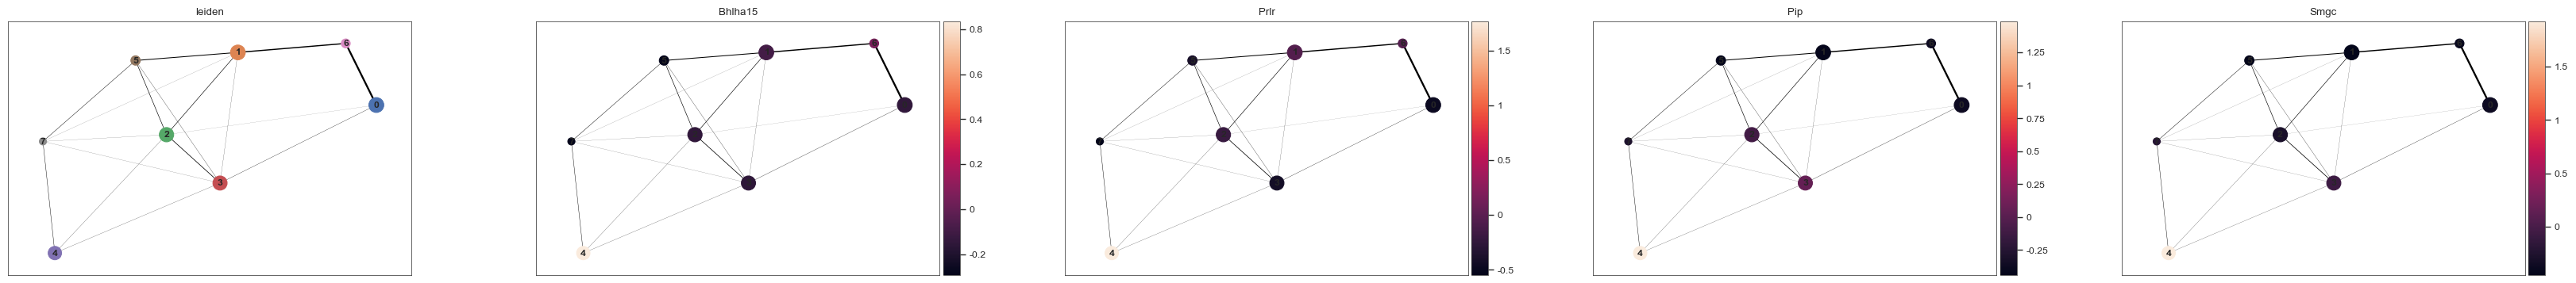

In [201]:
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, color = ['leiden',"Bhlha15", "Prlr","Pip"])

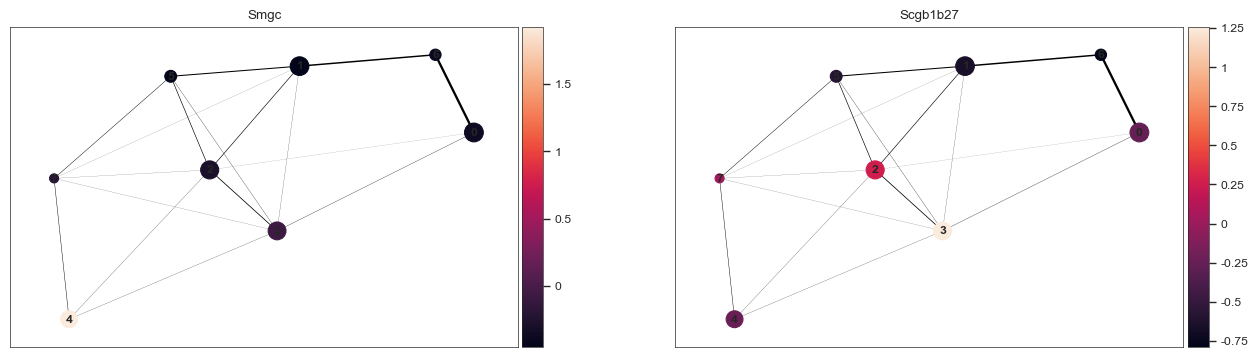

In [204]:
sc.pl.paga(adata_filter, color = ["Smgc", "Scgb1b27"])

### Ductal 1

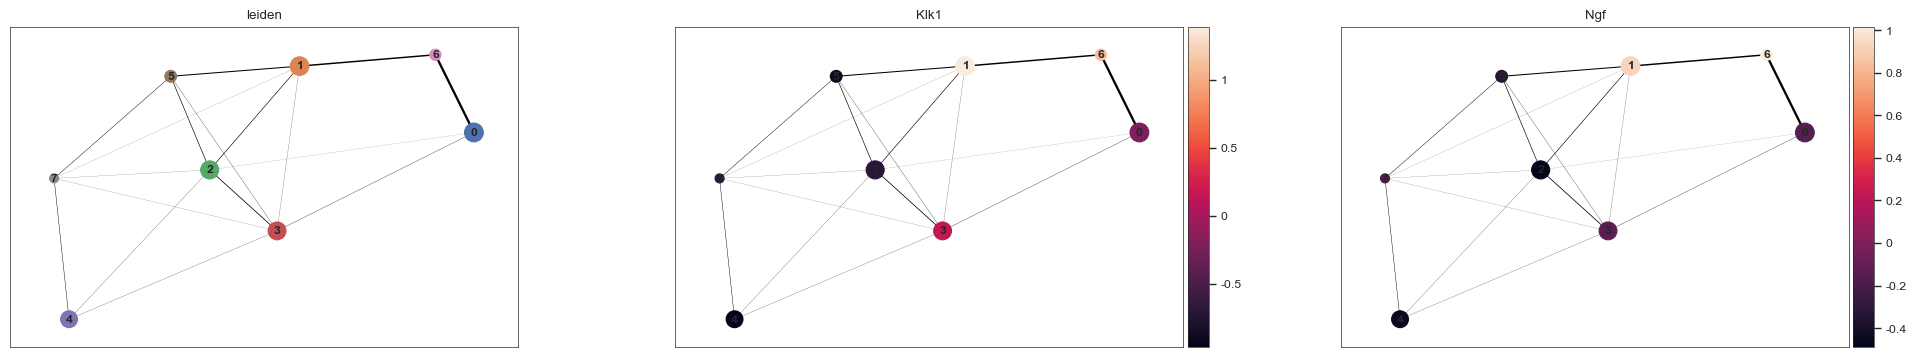

In [218]:
# Ductal 1 
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, color = ['leiden',"Klk1", "Ngf"])

### Ductal 2

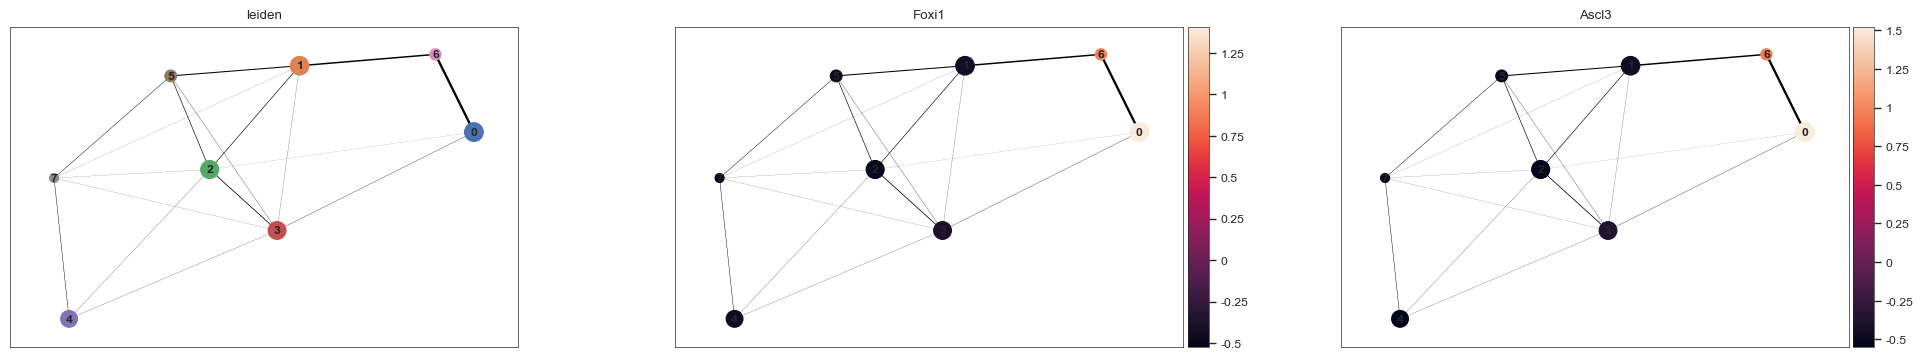

In [219]:
sc.pl.paga(adata_filter, color = ['leiden',"Foxi1", "Ascl3"])

### Ductal 3 

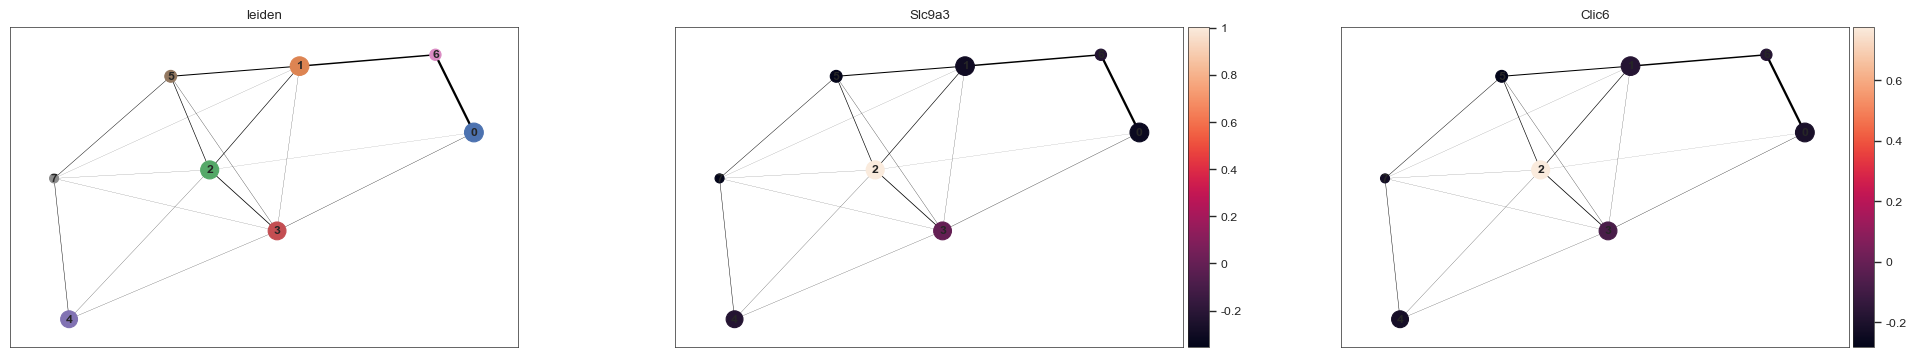

In [220]:
sc.pl.paga(adata_filter, color = ['leiden',"Slc9a3", "Clic6"])

### Basal 

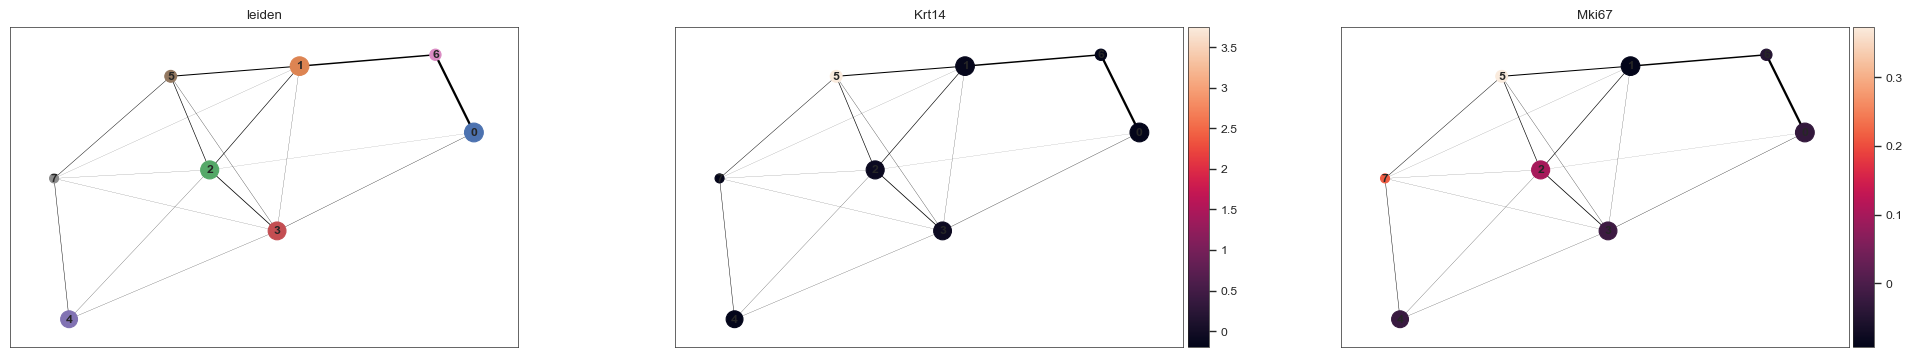

In [221]:
sc.pl.paga(adata_filter, color = ['leiden',"Krt14", "Mki67"])

<Axes: >

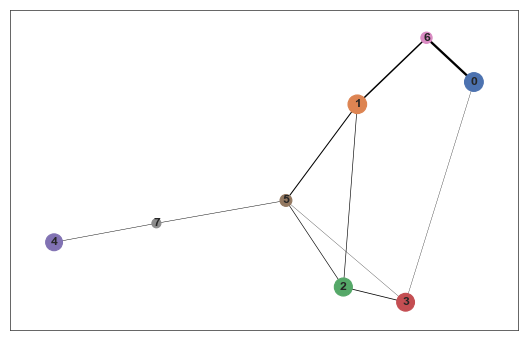

In [207]:
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, threshold=0.03, show=False)

In [210]:
sc.tl.draw_graph(adata_filter, init_pos='paga')

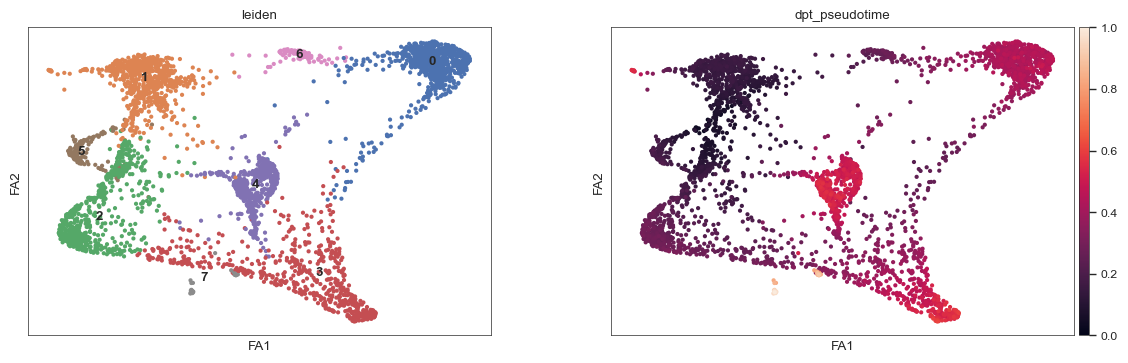

In [214]:
adata_filter.uns['iroot'] = np.flatnonzero(adata_filter.obs['leiden']  == '5')[0]
sc.tl.dpt(adata_filter)
sc.pl.draw_graph(adata_filter, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

In [215]:
adata_filter

AnnData object with n_obs × n_vars = 3274 × 5021
    obs: 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'ident', 'leiden', 'dpt_pseudotime'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'tsne', 'paga', 'leiden_sizes', 'draw_graph', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_tsne', 'X_draw_graph_fr', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'